In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import torch

from raytracerthing import RayTracerThing, Activations

np.random.seed(42)

In [2]:
digits = load_digits()
digits.keys()

y = digits['target']
y = np.array(y==0, dtype=int)

X = digits['images']
X = X / X.max()
N = X.shape[0]
image_shape = X.shape[1:]

print(N, image_shape)

print(y[:5])

1797 (8, 8)
[1 0 0 0 0]


In [3]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1619,  178]))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [5]:
%%time

clf = RayTracerThing(input_shape=image_shape,
                     hidden_layer_shape=image_shape, 
                     n_hidden_layers=3,
                     n_classes=2,
                     activation_func=Activations.softmax,
                     loss_func=torch.nn.functional.cross_entropy,
                     learning_rate=1)

CPU times: user 109 ms, sys: 0 ns, total: 109 ms
Wall time: 117 ms


In [6]:
%time clf.fit(X_train, y_train, batch_size=16, n_epochs=1000, early_stopping_epsilon=1e-5)

Epoch 1 of 1000 - train_loss: 0.3914 - train_acc: 0.9332 - val_loss: 0.3496 - val_acc: 0.9896
Epoch 2 of 1000 - train_loss: 0.3456 - train_acc: 0.9896 - val_loss: 0.3423 - val_acc: 0.9896
Epoch 3 of 1000 - train_loss: 0.3405 - train_acc: 0.9913 - val_loss: 0.3396 - val_acc: 0.9931
Epoch 4 of 1000 - train_loss: 0.3381 - train_acc: 0.9922 - val_loss: 0.3383 - val_acc: 0.9931
Epoch 5 of 1000 - train_loss: 0.3367 - train_acc: 0.9931 - val_loss: 0.3372 - val_acc: 0.9931
Epoch 6 of 1000 - train_loss: 0.3356 - train_acc: 0.9948 - val_loss: 0.3364 - val_acc: 0.9931
Epoch 7 of 1000 - train_loss: 0.3347 - train_acc: 0.9948 - val_loss: 0.3358 - val_acc: 0.9931
Epoch 8 of 1000 - train_loss: 0.3340 - train_acc: 0.9948 - val_loss: 0.3353 - val_acc: 0.9931
Epoch 9 of 1000 - train_loss: 0.3334 - train_acc: 0.9948 - val_loss: 0.3349 - val_acc: 0.9931
Epoch 10 of 1000 - train_loss: 0.3330 - train_acc: 0.9965 - val_loss: 0.3347 - val_acc: 0.9931
Epoch 11 of 1000 - train_loss: 0.3327 - train_acc: 0.9983 -

Epoch 87 of 1000 - train_loss: 0.3311 - train_acc: 0.9974 - val_loss: 0.3330 - val_acc: 0.9931
Epoch 88 of 1000 - train_loss: 0.3311 - train_acc: 0.9974 - val_loss: 0.3330 - val_acc: 0.9931
Epoch 89 of 1000 - train_loss: 0.3311 - train_acc: 0.9974 - val_loss: 0.3329 - val_acc: 0.9931
Epoch 90 of 1000 - train_loss: 0.3311 - train_acc: 0.9974 - val_loss: 0.3329 - val_acc: 0.9931
Epoch 91 of 1000 - train_loss: 0.3311 - train_acc: 0.9974 - val_loss: 0.3329 - val_acc: 0.9931
Epoch 92 of 1000 - train_loss: 0.3311 - train_acc: 0.9974 - val_loss: 0.3329 - val_acc: 0.9931
Epoch 93 of 1000 - train_loss: 0.3311 - train_acc: 0.9974 - val_loss: 0.3329 - val_acc: 0.9931
Epoch 94 of 1000 - train_loss: 0.3311 - train_acc: 0.9974 - val_loss: 0.3329 - val_acc: 0.9931
Epoch 95 of 1000 - train_loss: 0.3311 - train_acc: 0.9974 - val_loss: 0.3329 - val_acc: 0.9931
Epoch 96 of 1000 - train_loss: 0.3311 - train_acc: 0.9974 - val_loss: 0.3329 - val_acc: 0.9931
Epoch 97 of 1000 - train_loss: 0.3311 - train_acc:

In [7]:
clf.score(X_test, y_test)

tensor(0.9917)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       327
          1       1.00      0.91      0.95        33

avg / total       0.99      0.99      0.99       360



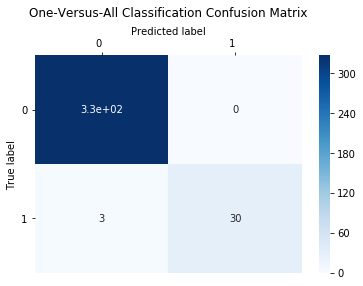

In [9]:
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.tick_top()
cm.xaxis.set_label_position('top')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('One-Versus-All Classification Confusion Matrix', y=1.15)
plt.savefig('images/one-versus-all_confusion_matrix.png')
plt.show()

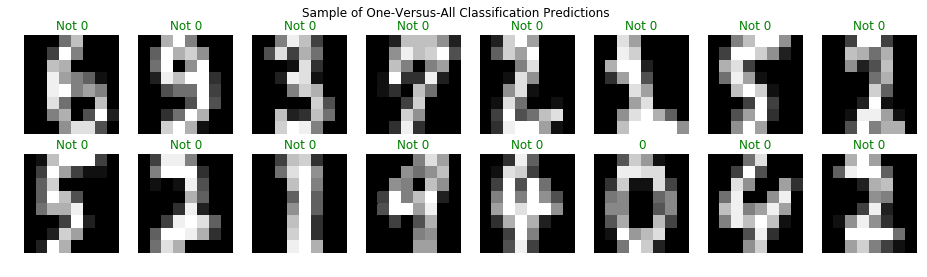

In [10]:
n_rows = 2
n_cols = 8
n_total = n_rows * n_cols
n_total = min(n_total, N)

width_ratio = 2
height_ratio = 2

figsize = (int(width_ratio * n_cols), int(height_ratio * n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = axes.ravel()

for ax, image, expected, actual in zip(axes, X_test[:n_total], y_test[:n_total], y_pred[:n_total]):
    sns.heatmap(image, cbar=False, cmap='gray', ax=ax)
    ax.set_axis_off()

    color = 'green' if expected == actual else 'red'
    ax.set_title('%s%d' % ('' if actual == 1 else 'Not ', 0), color=color)

plt.suptitle('Sample of One-Versus-All Classification Predictions')
plt.savefig('images/one-versus-all_classification_prediction_sample.png')

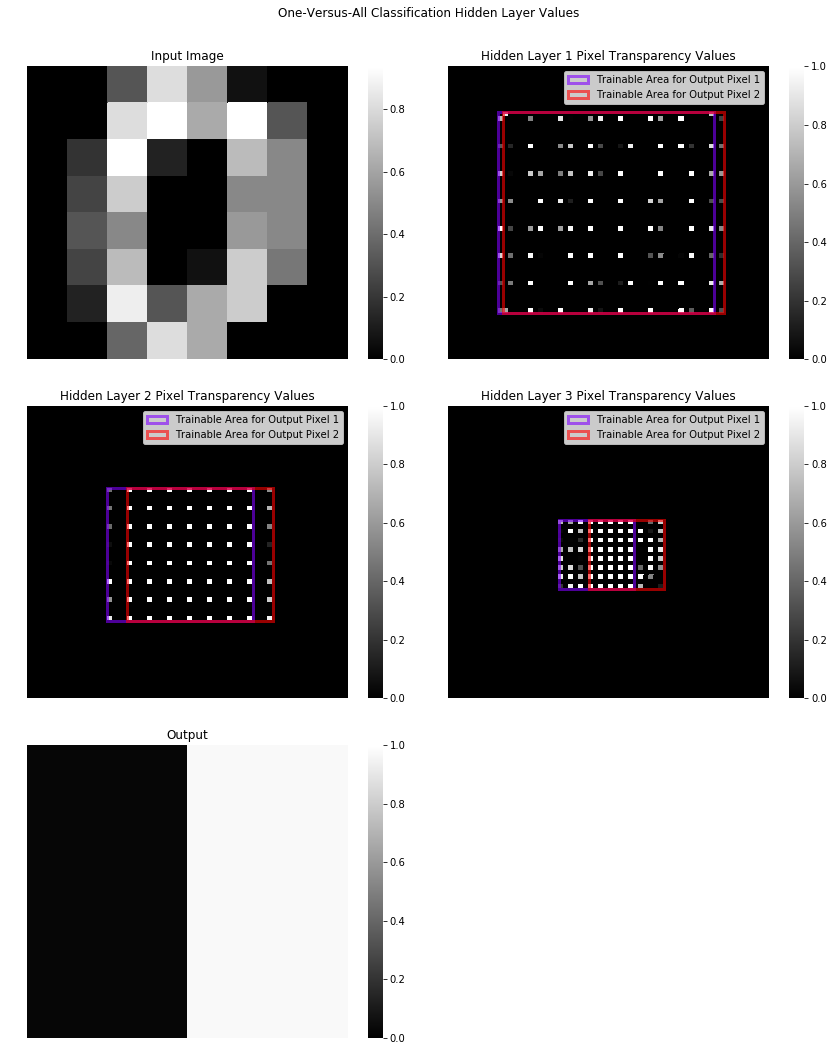

In [11]:
colors = plt.cm.rainbow(np.linspace(0, 1, clf.output_layer.n_rows * clf.output_layer.n_cols))

n_layers = 2 + clf.n_hidden_layers
n_cols = 2
n_rows = n_layers // 2

if n_layers % 2 > 0:
    n_rows += 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 15))
axes = axes.ravel()

ax = sns.heatmap(X[0], cmap='gray', ax=axes[0])
ax.set(title='Input Image')
ax.set_axis_off()

for (i, layer), ax in zip(enumerate(clf.hidden_layers), axes[1:-1]):
    ax = sns.heatmap(layer.pixel_values, vmin=0, cmap='gray', ax=ax)
        
    for row in range(clf.output_layer.n_rows):
        for col in range(clf.output_layer.n_cols):
            trained_pixels = clf.grid_W_map[row][col][i].keys() 

            min_extent = clf.hidden_layer_shape
            max_extent = (0, 0)

            for grid_coord in trained_pixels:
                grid_row, grid_col = grid_coord

                if grid_row < min_extent[0]:
                    min_extent = (grid_row, min_extent[1])

                if grid_row > max_extent[0]:
                    max_extent = (grid_row, max_extent[1])

                if grid_col < min_extent[1]:
                    min_extent = (min_extent[0], grid_col)

                if grid_col > max_extent[1]:
                    max_extent = (max_extent[0], grid_col)

            height = (max_extent[0] - min_extent[0]) + 1
            width = (max_extent[1] - min_extent[1]) + 1
            
            rect = patches.Rectangle((min_extent[1], min_extent[0]), width, height, 
                                     linewidth=3, alpha=0.6, edgecolor=colors[col], facecolor='none', 
                                     label='Trainable Area for Output Pixel %d' % (col + 1))

            ax.add_patch(rect)
            
        ax.set_axis_off()
        ax.set(title='Hidden Layer %d Pixel Transparency Values' % (i + 1))
        ax.legend()
        
ax = sns.heatmap(clf.predict_proba(X).detach().numpy()[0].reshape(1, -1), vmin=0, vmax=1, cmap='gray', ax=axes[n_layers - 1])
ax.set(title='Output')
ax.set_axis_off()

if n_layers % 2 > 0:
    fig.delaxes(axes[-1])

plt.suptitle('One-Versus-All Classification Hidden Layer Values')
plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.savefig('images/one-versus-all_classification_hidden_layer_values.png')